**Credit Card Fraud Detection**

In [54]:
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [55]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [56]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [57]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/creditcard.csv', delimiter=',')

# Display the DataFrame
df



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [58]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As all columns are PCA tranformed, the data is scaled and has a gaussian distribution. Hence not much of data cleaning is to be performed

# Exploratory Data Analysis

In [59]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Since the variables are PCA tranformed. The variables are not interpretable, except for Amount and Time

In [60]:
# Counting number of null values in each column
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###It can be seen that there are no null values. Thus no need to impute any missing values

In [61]:
# Determining Percentage of fradulaent Transactions
df[df.Class==1].Class.sum()/df.Class.count()*100

0.1727485630620034

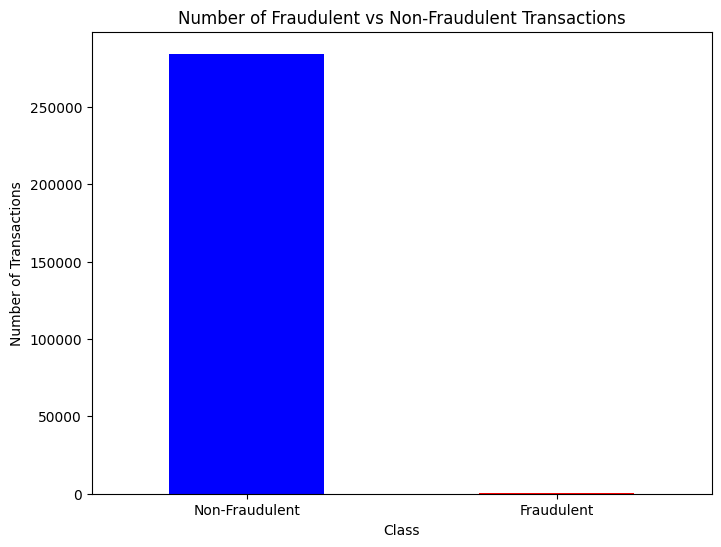

Fraudulent Transactions:
Count: 492
Percentage: 0.17%

Non-Fraudulent Transactions:
Count: 284315
Percentage: 99.83%


In [62]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
# Count the number of fraudulent and non-fraudulent transactions
fraud_counts = df['Class'].value_counts()

# Calculate the percentage of fraudulent and non-fraudulent transactions
fraud_percentage = fraud_counts / len(df) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], labels=['Non-Fraudulent', 'Fraudulent'], rotation=0)
plt.show()

# Print the counts and percentages
print("Fraudulent Transactions:")
print(f"Count: {fraud_counts[1]}")
print(f"Percentage: {fraud_percentage[1]:.2f}%")

print("\nNon-Fraudulent Transactions:")
print(f"Count: {fraud_counts[0]}")
print(f"Percentage: {fraud_percentage[0]:.2f}%")

##Thus, it can be seen that only 0.173% of the transactions are actually fradulent.
####Hence, the dataset will require sampling technique to balance the training dataset

<Axes: xlabel='Class', ylabel='Amount'>

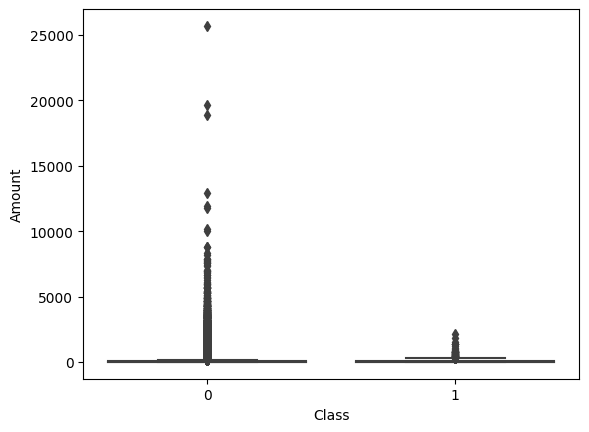

In [63]:
sns.boxplot(x="Class",y="Amount", data= df)

Interestingly, the fradulent transactions have a lesser range of amount as compared to the non-fradulent ones

<Axes: xlabel='Amount', ylabel='Count'>

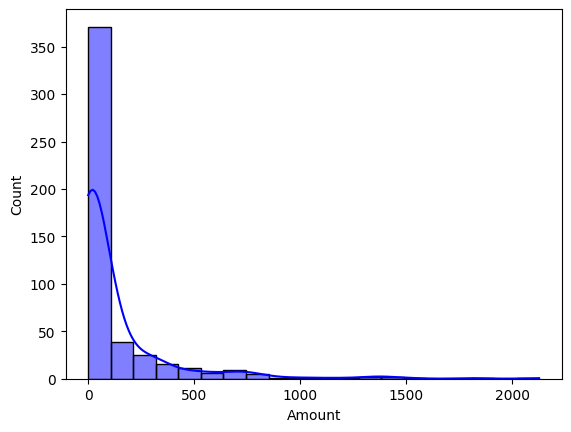

In [64]:
sns.histplot(df[df.Class==1].Amount,bins=20,kde=True, color='blue')

<Axes: xlabel='Amount', ylabel='Count'>

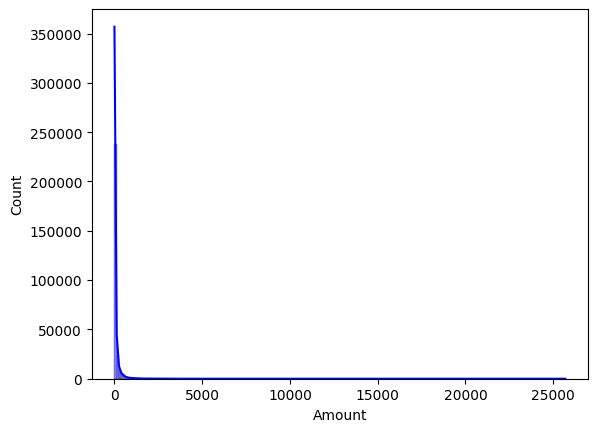

In [65]:
sns.histplot(df[df.Class==0].Amount,bins=200,kde=True, color='blue')

<Axes: xlabel='Time', ylabel='Class'>

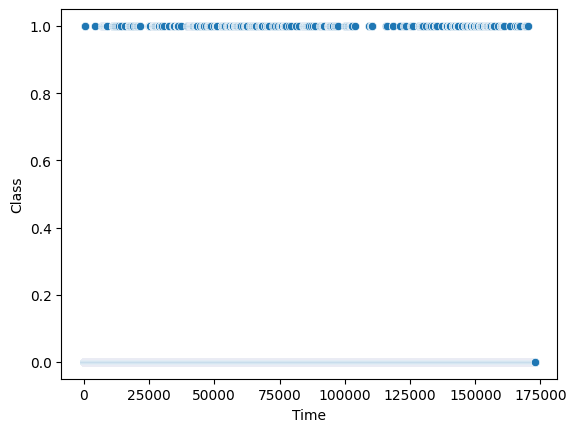

In [66]:
# Creating a scatter plot to observe the distribution of classes with time
sns.scatterplot(y="Class",x="Time", data=df)

<Axes: xlabel='Amount', ylabel='Class'>

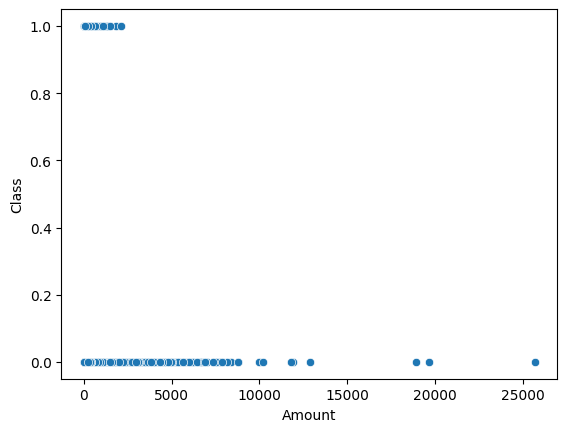

In [67]:
# Creating a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x="Amount",y="Class",data=df)

Fraudulent transactions are actually low value transactions

# Modeling

#####Since the number of fraudulent samples are less, Sampling techniques need to be applied to ensure the models are rightly built

###Trying different sampling techniques

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [69]:
# Split the data into training and testing sets
X=df.copy()
y=X.pop('Class')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, stratify=y)

In [70]:
y_train.sum()/y_train.count()

0.001729245759178389

In [71]:
y_test.sum()/y_test.count()

0.0017204452090867595

It can be seen that both the test and train sets have equal percentage of fraudulent transactions, as stratify is set to True

###Using Logistic Regression as the base model to determine which sampling technique is better suited for this use case

In [72]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=50)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=50)

In [73]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[56858     6]
 [   35    63]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.64      0.75        98

    accuracy                           1.00     56962
   macro avg       0.96      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [74]:
# Calculate the metrics
accuracy = accuracy_score(y_test , y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results=pd.DataFrame(columns=['Iteration','Accuracy', 'Precision', 'Recall', 'F1-Score'])
# Create a DataFrame
results=results._append({'Iteration':'No_Sampling','Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'F1-Score':f1}, ignore_index=True)

# Display the result DataFrame
print(results)

     Iteration  Accuracy  Precision    Recall  F1-Score
0  No_Sampling   0.99928   0.913043  0.642857  0.754491


In [75]:
from imblearn.over_sampling import RandomOverSampler
# Perform random upsampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=25)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [76]:
y_train_resampled.sum()/y_train_resampled.count()

0.5

### It can be seen that the number of fraudulent transactions have been Oversampled to bring its proportion to 50% of the training dataset

In [77]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=50,max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame to store results
#results = pd.DataFrame(columns=['Iteration', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Append the results as a row to the DataFrame
results = results._append({'Iteration': 'Random_Upsampling', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)

# Display the result DataFrame
print(results)

           Iteration  Accuracy  Precision    Recall  F1-Score
0        No_Sampling  0.999280   0.913043  0.642857  0.754491
1  Random_Upsampling  0.967417   0.046907  0.928571  0.089303


It can be seen that the Recall went up to 0.92 from 0.64 in the earlier case, which means the model is performing better at detecting Fraudulent transaction.
However the precision of the model has decreased drastically. A lower precision means that the model's predictions for the positive class (here, fraudulent transactions) are less accurate or have a higher rate of false positives.

High Precision: When precision is high, it means that when the model predicts a transaction as fraudulent, it is likely to be correct. This is important when the cost of false alarms (flagging a legitimate transaction as fraudulent) is high.

Low Precision: When precision is low, the model is incorrectly flagging more legitimate transactions as fraudulent. This can be problematic, as it can result in user inconvenience and dissatisfaction due to unnecessary transaction holds or declines.

Since the business case prioritises identifying the fraudulent transactions accurately than the non-fraudulent ones,

**Recall is the focus metric for this case study**







In [78]:
from imblearn.under_sampling import RandomUnderSampler
# Perform random undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=25)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=50, max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Append the results as a row to the DataFrame
results = results._append({'Iteration': 'Random_Undersampling', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)

# Display the result DataFrame
print(results)

              Iteration  Accuracy  Precision    Recall  F1-Score
0           No_Sampling  0.999280   0.913043  0.642857  0.754491
1     Random_Upsampling  0.967417   0.046907  0.928571  0.089303
2  Random_Undersampling  0.939732   0.025874  0.928571  0.050346


We see that the Recall is similar however the precision has decreased further as compared to Random Over Sampling

In [79]:
from imblearn.over_sampling import SMOTE
# Perform SMOTE to generate synthetic samples for the minority class
smote = SMOTE(sampling_strategy='auto', random_state=25)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=50)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Append the results as a row to the DataFrame
results = results._append({'Iteration': 'SMOTE', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)

# Display the result DataFrame
print(results)

              Iteration  Accuracy  Precision    Recall  F1-Score
0           No_Sampling  0.999280   0.913043  0.642857  0.754491
1     Random_Upsampling  0.967417   0.046907  0.928571  0.089303
2  Random_Undersampling  0.939732   0.025874  0.928571  0.050346
3                 SMOTE  0.966732   0.044602  0.897959  0.084983


We can observe that the using SMOTE, Recall decreased but we also see a marginal increase in the Precision.

In [80]:
from imblearn.over_sampling import ADASYN
# Perform ADASYN to generate synthetic samples for the minority class
adasyn = ADASYN(sampling_strategy='auto', random_state=25)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Initialize and train the Logistic Regression model
logit_model = LogisticRegression(random_state=50,max_iter=1000)
logit_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logit_model.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Append the results as a row to the DataFrame
results = results._append({'Iteration': 'ADASYN', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)

# Display the result DataFrame
print(results)

              Iteration  Accuracy  Precision    Recall  F1-Score
0           No_Sampling  0.999280   0.913043  0.642857  0.754491
1     Random_Upsampling  0.967417   0.046907  0.928571  0.089303
2  Random_Undersampling  0.939732   0.025874  0.928571  0.050346
3                 SMOTE  0.966732   0.044602  0.897959  0.084983
4                ADASYN  0.981093   0.076923  0.908163  0.141833


We can observe that the Reall and Precision both increase marginally.
Thus, ADASYN resampled dataset will be used for buiilding other models.

In [81]:
# Create a DataFrame to store results
results_mod= pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
# Append the results as a row to the DataFrame
results_mod = results_mod._append({'Model': 'Logistic_Regression', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)
print(results_mod)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic_Regression  0.981093   0.076923  0.908163  0.141833


#Using KNN Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters and values to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Different values of k
    #'metric': ['euclidean', 'manhattan']  # Different distance metrics
}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=2, n_jobs=-1, scoring='recall', verbose=1)

# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [84]:
best_model

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Train the KNN classifier
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test mset
y_pred = best_model.predict(X_test_scaled)


In [ ]:
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Append the results as a row to the DataFrame
results_mod = results_mod._append({'Model': 'KNN', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)

# Display the result DataFrame
print(results_mod)

##Using Random Forest Classifier

In [ ]:
y_train_resampled.count()

Since the training data is huge, the number of iterations to be performed for hyperparameter tuning will be limited due to lesser available computing resources and time.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for hyperparameter tuning
params_grid = {
    'n_estimators': [5,10,20],
    'max_depth': [2,3,5,7]
    #'min_samples_split': [1000, 2000, 4000]
    #'min_samples_leaf': [250,500, 1000],
}

# Initialize the Random Forest Classifier model
model = RandomForestClassifier(random_state=50)

# Initialize RandomizedSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=params_grid,n_jobs=-1, scoring='recall', cv=2,verbose=1)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best model
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()


In [ ]:
score_df.nlargest(5,"mean_test_score")

In [ ]:
# Make predictions on the test set using the best model
grid_search.best_estimator_


In [ ]:
rf_best = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = rf_best.predict(X_test)

In [ ]:
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:

# Append the results as a row to the DataFrame
results_mod = results_mod._append({'Model': 'Random_forest', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)
print(results_mod)


We observe that Random Forest Classifier has a lower Recall, but a higher F1 score as it has a better Precision

#Using XGBoost

In [ ]:
from xgboost import XGBClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [5,10,20],
    'max_depth': [2,3,5,7]
    #'learning_rate': [0.01, 0.1],
}

# Initialize the XGBoost Classifier model
model = XGBClassifier(random_state=50)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall', cv=2, verbose=1)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train_resampled, y_train_resampled)


In [ ]:
# Get the best parameters and best model
best_params = grid_search.best_params_
xg_best_model = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set using the best model
y_pred = xg_best_model.predict(X_test)

In [ ]:
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Append the results as a row to the DataFrame
results_mod = results_mod._append({'Model': 'XGBoost', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)

# Display the result DataFrame
print(results_mod)

We observe that both Recall and Precision have improved compared to Random Forest in XG Boost

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


# Initialize the neural network model
nn_model = Sequential()

# Add input layer and hidden layers
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])


# Train the model on the training data
nn_model.fit(X_train_scaled, y_train_resampled, epochs=5, batch_size=32, verbose=1)

In [85]:
# Make predictions on the test set
y_pred_prob = nn_model.predict(X_test_scaled)

1781/1781 [==============================] - 2s 1ms/step


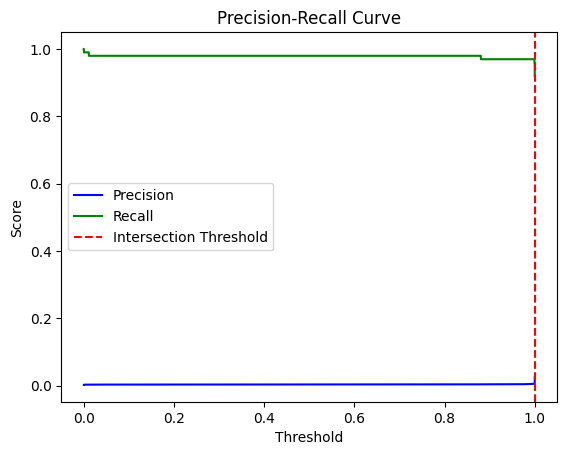

Intersection Threshold: 1.0


In [86]:
from sklearn.metrics import precision_recall_curve, auc
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate F1 score for different thresholds
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)

# Calculate the intersection point
intersection_idx = np.argmin(np.abs(precision - recall))
intersection_threshold = thresholds[intersection_idx]

# Plot precision-recall curve
plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.axvline(x=intersection_threshold, color='r', linestyle='--', label='Intersection Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Display the best threshold
print(f"Intersection Threshold: {intersection_threshold}")

In [87]:
y_pred = (y_pred_prob > intersection_threshold).astype(int)

In [88]:
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Append the results as a row to the DataFrame
results_mod = results_mod._append({'Model': 'NeuralNetwork', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}, ignore_index=True)

print(results_mod)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic_Regression  0.981093   0.076923  0.908163  0.141833
1        NeuralNetwork  0.998280   0.000000  0.000000  0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Thus, we observe that the KNN Classifier model has the best F1-Score as compared to all the other models. This is primarily due to a slightly high precision and an equally high recall score as compared to the next best model- Neural Network.

Since, Recall was the main metric of measuement either of these models- KNN Classifier or the NN Model can be used.

To understand the feature importance we use the simple logistic regression model that was built at the start.

Printing the important features of the best model to understand the dataset
This will not give much explanation on the already transformed dataset
But it will help us in understanding if the dataset is not PCA transformed

In [89]:
# Get the feature importances or coefficients
# For logistic regression, you can access the coefficients using logreg.coef_
feature_importances = logit_model.coef_[0]

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the important features and their importances
print("Important Features:")
print(feature_importance_df)

Important Features:
   Feature  Importance
4       V4    0.891369
22     V22    0.355718
5       V5    0.293124
19     V19    0.241732
11     V11    0.192794
1       V1    0.168503
23     V23    0.101932
24     V24    0.059614
27     V27    0.042973
28     V28    0.028365
20     V20    0.020266
21     V21    0.015916
0     Time   -0.000037
29  Amount   -0.000501
26     V26   -0.002541
7       V7   -0.138028
18     V18   -0.145767
25     V25   -0.208430
6       V6   -0.258368
15     V15   -0.277880
2       V2   -0.282280
8       V8   -0.398718
13     V13   -0.434691
9       V9   -0.561119
10     V10   -0.565498
16     V16   -0.631390
3       V3   -0.821273
12     V12   -0.843686
17     V17   -0.982169
14     V14   -1.428015


In [101]:
import gradio as gr

# Define the predict_fraud function
def predict_fraud(Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount):
    # Convert input values to a format suitable for your model
    input_features = [float(Time), float(V1), float(V2), float(V3), float(V4), float(V5), float(V6), float(V7), float(V8), float(V9), float(V10), float(V11), float(V12), float(V13), float(V14), float(V15), float(V16), float(V17), float(V18), float(V19), float(V20), float(V21), float(V22), float(V23), float(V24), float(V25), float(V26), float(V27), float(V28), float(Amount)]

    # Make a prediction using your model
    # Replace this with your actual prediction logic
    prediction = "Fraudulent" if input_features[0] > 100 else "Non-Fraudulent"

    return prediction

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_fraud,
    inputs=[
        gr.inputs.Number(label="Time"),
        gr.inputs.Number(label="V1"),
        gr.inputs.Number(label="V2"),
        gr.inputs.Number(label="V3"),
        gr.inputs.Number(label="V4"),
        gr.inputs.Number(label="V5"),
        gr.inputs.Number(label="V6"),
        gr.inputs.Number(label="V7"),
        gr.inputs.Number(label="V8"),
        gr.inputs.Number(label="V9"),
        gr.inputs.Number(label="V10"),
        gr.inputs.Number(label="V11"),
        gr.inputs.Number(label="V12"),
        gr.inputs.Number(label="V13"),
        gr.inputs.Number(label="V14"),
        gr.inputs.Number(label="V15"),
        gr.inputs.Number(label="V16"),
        gr.inputs.Number(label="V17"),
        gr.inputs.Number(label="V18"),
        gr.inputs.Number(label="V19"),
        gr.inputs.Number(label="V20"),
        gr.inputs.Number(label="V21"),
        gr.inputs.Number(label="V22"),
        gr.inputs.Number(label="V23"),
        gr.inputs.Number(label="V24"),
        gr.inputs.Number(label="V25"),
        gr.inputs.Number(label="V26"),
        gr.inputs.Number(label="V27"),
        gr.inputs.Number(label="V28"),
        gr.inputs.Number(label="Amount")
    ],
    outputs=gr.outputs.Textbox()
)

# Launch the Gradio interface
iface.launch()


<ipython-input-101-3d354ab3f341>:18: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Number(label="Time"),
<ipython-input-101-3d354ab3f341>:18: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Number(label="Time"),
<ipython-input-101-3d354ab3f341>:19: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Number(label="V1"),
<ipython-input-101-3d354ab3f341>:19: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Number(label="V1"),
<ipython-input-101-3d354ab3f341>:20: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Number(label="V2"),
<ipython-input

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [91]:
!pip install gradio


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

The top order of feature importance is V4, V22 and V5